In [76]:
import requests 
import csv
import pandas as pd
import seaborn as sns 
import plotly.express as px

## show the json file to know how extract the data I want 

In [77]:
response=requests.get('https://coronavirus.m.pipedream.net/').json()
response

{'summaryStats': {'global': {'confirmed': 676570149,
   'recovered': None,
   'deaths': 6881804},
  'china': {'confirmed': 0, 'recovered': 0, 'deaths': 0},
  'nonChina': {'confirmed': 676570149, 'recovered': None, 'deaths': 6881804}},
 'cache': {'lastUpdated': '4 minutes ago',
  'expires': 'in a minute',
  'lastUpdatedTimestamp': 1692040866870,
  'expiresTimestamp': 1692041166870},
 'dataSource': {'url': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-09-2023.csv',
  'lastGithubCommit': '2023-03-10T04:51:58Z',
  'publishedBy': 'John Hopkins University Center for Systems Science and Engineering',
  'ref': 'https://github.com/CSSEGISandData/COVID-19'},
 'apiSourceCode': 'https://pipedream.com/@/p_G6CLVM',
 'rawData': [{'FIPS': '',
   'Admin2': '',
   'Province_State': '',
   'Country_Region': 'Afghanistan',
   'Last_Update': '2023-03-10 04:21:03',
   'Lat': '33.93911',
   'Long_': '67.709953',
   'Confirmed': '209451',
 

In [78]:
response['rawData']

[{'FIPS': '',
  'Admin2': '',
  'Province_State': '',
  'Country_Region': 'Afghanistan',
  'Last_Update': '2023-03-10 04:21:03',
  'Lat': '33.93911',
  'Long_': '67.709953',
  'Confirmed': '209451',
  'Deaths': '7896',
  'Recovered': '',
  'Active': '',
  'Combined_Key': 'Afghanistan',
  'Incident_Rate': '538.0424508714615',
  'Case_Fatality_Ratio': '3.76985547932452'},
 {'FIPS': '',
  'Admin2': '',
  'Province_State': '',
  'Country_Region': 'Albania',
  'Last_Update': '2023-03-10 04:21:03',
  'Lat': '41.1533',
  'Long_': '20.1683',
  'Confirmed': '334457',
  'Deaths': '3598',
  'Recovered': '',
  'Active': '',
  'Combined_Key': 'Albania',
  'Incident_Rate': '11621.96817012996',
  'Case_Fatality_Ratio': '1.075773567304616'},
 {'FIPS': '',
  'Admin2': '',
  'Province_State': '',
  'Country_Region': 'Algeria',
  'Last_Update': '2023-03-10 04:21:03',
  'Lat': '28.0339',
  'Long_': '1.6596',
  'Confirmed': '271496',
  'Deaths': '6881',
  'Recovered': '',
  'Active': '',
  'Combined_Key': 

In [80]:
with open('corona_file.csv','w',encoding='utf8',newline='') as f:
    writer=csv.writer(f)
    writer.writerow(['Country_Region','Confirmed','Deaths'])
    for country in response['rawData']:
        writer.writerow([country['Country_Region'],country['Confirmed'],country['Deaths']])
    

In [81]:
df=pd.read_csv('corona_file.csv')
df

,Country_Region,Confirmed,Deaths
0,Afghanistan,209451,7896
1,Albania,334457,3598
2,Algeria,271496,6881
3,Andorra,47890,165
4,Angola,105288,1933
...,...,...,...
4011,West Bank and Gaza,703228,5708
4012,Winter Olympics 2022,535,0
4013,Yemen,11945,2159
4014,Zambia,343135,4057


## show if there are any duplicated rows

In [82]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4011    False
4012    False
4013    False
4014    False
4015    False
Length: 4016, dtype: bool

## show if there are any duplicated countries

In [83]:
df['Country_Region'].value_counts()

US          3279
Russia        83
Japan         49
India         37
China         34
            ... 
Guyana         1
Haiti          1
Holy See       1
Honduras       1
Zimbabwe       1
Name: Country_Region, Length: 201, dtype: int64

In [84]:
df['Country_Region'].value_counts()>1

US           True
Russia       True
Japan        True
India        True
China        True
            ...  
Guyana      False
Haiti       False
Holy See    False
Honduras    False
Zimbabwe    False
Name: Country_Region, Length: 201, dtype: bool

In [87]:
df['Country_Region'].value_counts()[df['Country_Region'].value_counts()>1]

US                3279
Russia              83
Japan               49
India               37
China               34
Colombia            34
Mexico              33
Ukraine             28
Brazil              27
Peru                26
Sweden              21
Italy               21
Spain               20
United Kingdom      19
Germany             17
Chile               17
Netherlands         17
Malaysia            17
Canada              16
Belgium             12
France              12
Australia            8
Pakistan             7
New Zealand          3
Denmark              3
Name: Country_Region, dtype: int64

In [88]:
countries_repeated=list(df['Country_Region'].value_counts()[df['Country_Region'].value_counts()>1].index)
countries_repeated

['US',
 'Russia',
 'Japan',
 'India',
 'China',
 'Colombia',
 'Mexico',
 'Ukraine',
 'Brazil',
 'Peru',
 'Sweden',
 'Italy',
 'Spain',
 'United Kingdom',
 'Germany',
 'Chile',
 'Netherlands',
 'Malaysia',
 'Canada',
 'Belgium',
 'France',
 'Australia',
 'Pakistan',
 'New Zealand',
 'Denmark']

In [89]:
df_cleaned=df.groupby('Country_Region').max()
df_cleaned

,Confirmed,Deaths
Country_Region,,
Afghanistan,209451,7896
Albania,334457,3598
Algeria,271496,6881
Andorra,47890,165
Angola,105288,1933
...,...,...
West Bank and Gaza,703228,5708
Winter Olympics 2022,535,0
Yemen,11945,2159


C:\Users\noura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Confirmed', ylabel='count'>

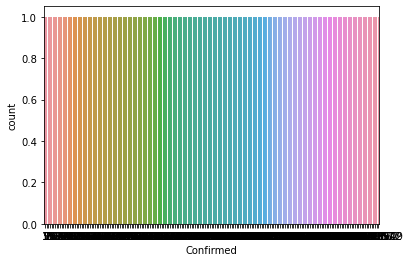

In [90]:
sns.countplot(df_cleaned['Confirmed'])

## so we have nothing clear in that graph.......
### let's minimize the countries

In [91]:
list1=[]
for i in range (len(countries_repeated)):
    df_mini= df[df['Country_Region']==countries_repeated[i]].max()
    list1.append(df_mini)

In [92]:
list1[0]

Country_Region         US
Confirmed         3710586
Deaths              35545
dtype: object

In [93]:
list1[0][0]

'US'

In [94]:
list1[0][1]

3710586

In [95]:
list1[0][2]

35545

In [96]:
len(list1)

25

In [97]:
list1_0=[]
list1_1=[]
list1_2=[]
for i in range(len(list1)):
    list1_0.append(list1[i][0])
    list1_1.append(list1[i][1])
    list1_2.append(list1[i][1])

In [98]:
df_repeated_countries=pd.DataFrame({'Country_Region':list1_0, 'Confirmed':list1_1,'Deaths':list1_2})

In [99]:
df_repeated_countries

,Country_Region,Confirmed,Deaths
0,US,3710586,3710586
1,Russia,3439248,3439248
2,Japan,4323708,4323708
3,India,8138129,8138129
4,China,2876106,2876106
5,Colombia,1874877,1874877
6,Mexico,1858660,1858660
7,Ukraine,589607,589607
8,Brazil,6469442,6469442
9,Peru,2110001,2110001


C:\Users\noura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Confirmed', ylabel='count'>

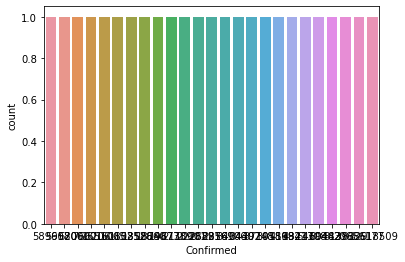

In [100]:
sns.countplot(df_repeated_countries['Confirmed'])

<AxesSubplot:xlabel='Country_Region'>

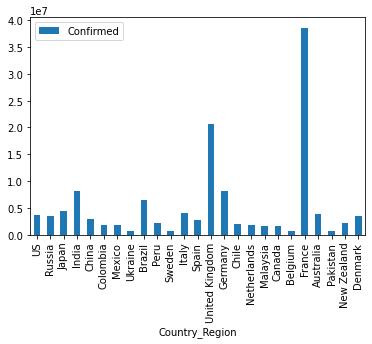

In [101]:
df2.plot.bar(x='Country_Region', y='Confirmed')

<AxesSubplot:xlabel='Country_Region'>

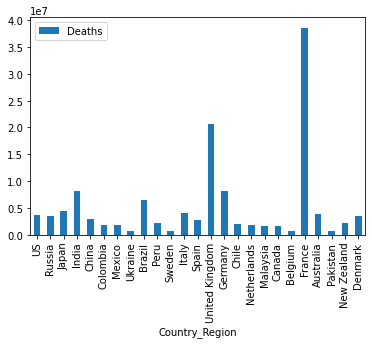

In [102]:
df2.plot.bar(x='Country_Region', y='Deaths')

## so the conclusion is France is the most country had deaths and also the most country had confimed